In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [6]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_5s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_5s_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=128, CH = CH)

In [7]:
len(train_loader), len(val_loader), len(test_loader)

(1073, 114, 107)

In [8]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 5])
torch.Size([128, 1])
128
128
128


date:180324, rec:008, time:3560.0, label:0.0


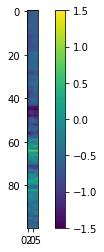

date:180410, rec:005, time:6459.0, label:1.0
date:180327, rec:008, time:527.0, label:0.0


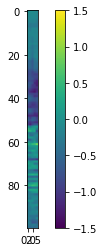

date:180325, rec:002, time:6247.0, label:1.0
date:180327, rec:007, time:3877.0, label:0.0


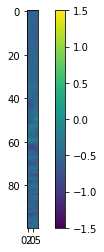

date:180325, rec:004, time:5113.0, label:1.0
date:180410, rec:006, time:4978.0, label:1.0
date:180410, rec:005, time:2299.0, label:1.0
date:180327, rec:002, time:1432.0, label:1.0
date:180711, rec:001, time:4966.0, label:0.0


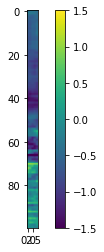

date:180324, rec:003, time:4257.0, label:1.0
date:180327, rec:008, time:1874.0, label:0.0


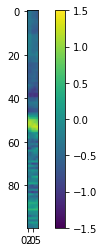

date:180330, rec:003, time:4519.0, label:1.0
date:171023, rec:006, time:197.0, label:1.0
date:180327, rec:007, time:2347.0, label:0.0


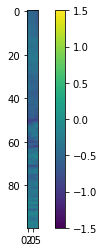

date:180323, rec:007, time:2121.0, label:0.0


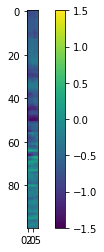

date:171020, rec:005, time:676.0, label:1.0
date:180329, rec:002, time:3764.0, label:1.0
date:180323, rec:002, time:5627.0, label:1.0
date:180712, rec:008, time:2160.0, label:0.0


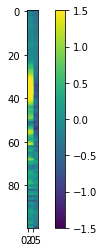

date:180330, rec:009, time:1311.0, label:0.0


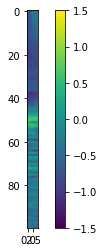

date:180327, rec:008, time:3804.0, label:0.0


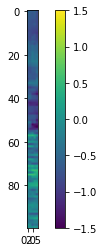

date:180401, rec:001, time:1957.0, label:0.0


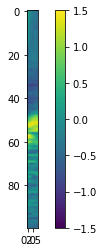

date:180324, rec:006, time:4540.0, label:1.0
date:180324, rec:001, time:2444.0, label:0.0


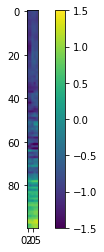

date:180324, rec:008, time:6956.0, label:0.0


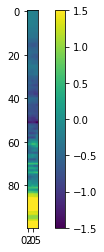

date:180401, rec:001, time:1292.0, label:0.0


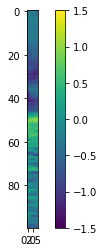

date:180325, rec:001, time:7063.0, label:1.0
date:180323, rec:007, time:2952.0, label:0.0


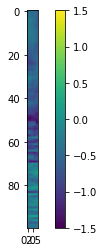

date:180327, rec:001, time:4122.0, label:0.0


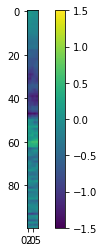

date:171021, rec:004, time:6602.0, label:0.0


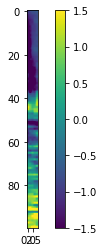

date:180712, rec:008, time:3910.0, label:0.0


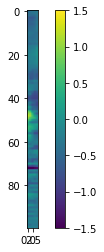

date:180713, rec:006, time:933.0, label:1.0
date:180712, rec:008, time:5691.0, label:0.0


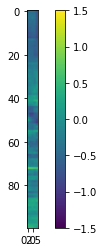

date:180325, rec:009, time:4531.0, label:0.0


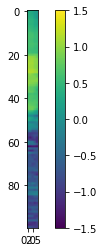

date:180330, rec:001, time:6858.0, label:1.0
date:180327, rec:008, time:4194.0, label:0.0


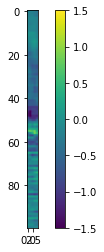

date:180323, rec:007, time:5598.0, label:0.0


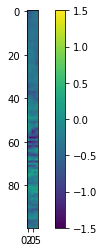

date:180713, rec:001, time:3435.0, label:0.0


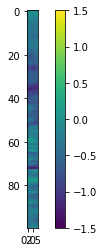

date:180712, rec:007, time:6120.0, label:1.0
date:180324, rec:008, time:6781.0, label:0.0


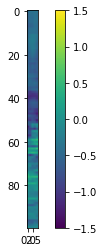

date:180330, rec:008, time:2943.0, label:0.0


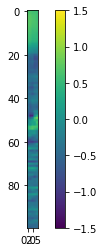

date:180329, rec:006, time:5963.0, label:1.0
date:180324, rec:006, time:3931.0, label:1.0
date:171022, rec:004, time:3063.0, label:1.0
date:180330, rec:005, time:4393.0, label:1.0
date:180324, rec:008, time:3625.0, label:0.0


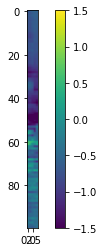

date:180325, rec:002, time:92.0, label:1.0
date:180711, rec:001, time:1609.0, label:0.0


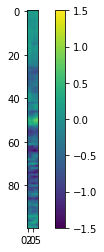

date:180329, rec:004, time:1615.0, label:1.0
date:180712, rec:002, time:437.0, label:0.0


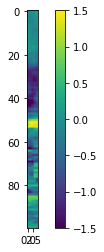

date:180327, rec:004, time:3212.0, label:1.0
date:180401, rec:002, time:3028.0, label:1.0
date:180410, rec:003, time:6106.0, label:1.0
date:180410, rec:006, time:2313.0, label:1.0
date:180327, rec:007, time:6073.0, label:0.0


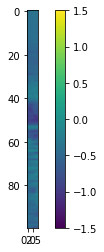

date:180322, rec:004, time:4631.0, label:1.0
date:180324, rec:008, time:3645.0, label:0.0


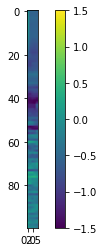

date:180325, rec:009, time:2057.0, label:0.0


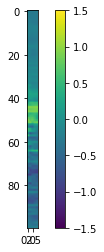

date:180327, rec:008, time:92.0, label:0.0


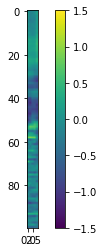

date:180330, rec:009, time:1871.0, label:0.0


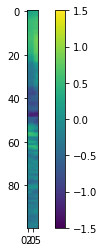

date:180713, rec:002, time:3057.0, label:0.0


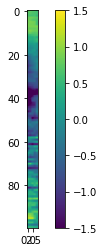

date:180324, rec:001, time:2614.0, label:0.0


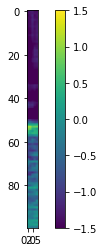

date:180323, rec:007, time:4789.0, label:0.0


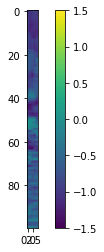

date:180712, rec:003, time:5282.0, label:1.0
date:180325, rec:002, time:3906.0, label:0.0


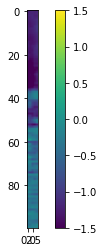

date:180325, rec:006, time:2209.0, label:1.0
date:180331, rec:003, time:407.0, label:1.0
date:171022, rec:004, time:2618.0, label:1.0
date:180330, rec:009, time:1901.0, label:0.0


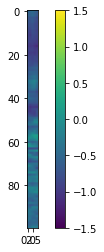

date:180713, rec:001, time:2985.0, label:0.0


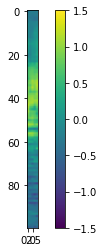

date:180330, rec:008, time:3768.0, label:0.0


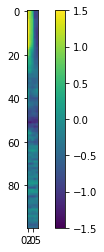

date:171023, rec:004, time:5268.0, label:1.0
date:180324, rec:001, time:162.0, label:0.0


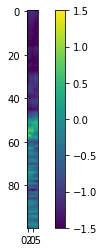

date:180327, rec:007, time:3467.0, label:0.0


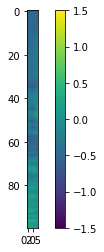

date:180329, rec:004, time:6068.0, label:1.0
date:180330, rec:009, time:6063.0, label:0.0


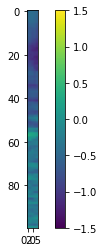

date:180330, rec:008, time:2218.0, label:0.0


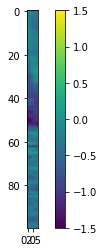

date:180711, rec:001, time:2014.0, label:0.0


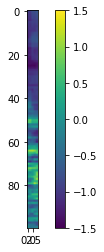

date:180324, rec:008, time:5431.0, label:0.0


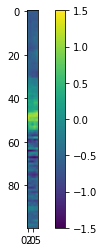

date:180711, rec:006, time:6525.0, label:1.0
date:180331, rec:001, time:987.0, label:0.0


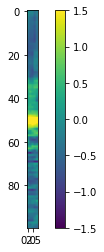

date:180330, rec:004, time:5874.0, label:1.0
date:180327, rec:007, time:2492.0, label:0.0


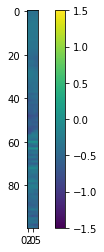

date:180713, rec:001, time:3580.0, label:0.0


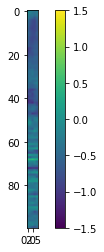

date:171022, rec:001, time:1494.0, label:0.0


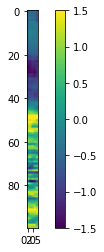

date:180325, rec:004, time:4721.0, label:1.0
date:180323, rec:002, time:1974.0, label:1.0
date:180325, rec:007, time:6805.0, label:0.0


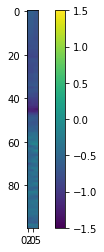

date:180325, rec:002, time:5725.0, label:1.0
date:180712, rec:003, time:5067.0, label:1.0
date:180327, rec:001, time:5812.0, label:1.0
date:180401, rec:001, time:1507.0, label:0.0


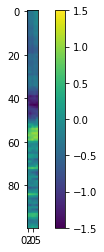

date:180325, rec:004, time:3652.0, label:1.0
date:180324, rec:001, time:1674.0, label:1.0
date:180712, rec:008, time:112.0, label:0.0


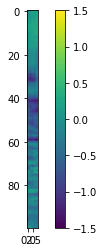

date:180323, rec:002, time:7160.0, label:1.0
date:180714, rec:006, time:6878.0, label:0.0


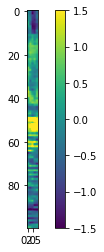

date:180410, rec:005, time:5714.0, label:1.0
date:180324, rec:006, time:3391.0, label:1.0
date:180331, rec:005, time:5825.0, label:1.0
date:180327, rec:008, time:4880.0, label:0.0


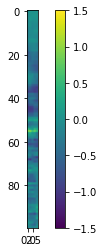

date:180713, rec:002, time:6194.0, label:1.0
date:180331, rec:003, time:5570.0, label:1.0
date:180325, rec:009, time:562.0, label:0.0


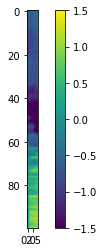

date:180330, rec:007, time:2555.0, label:1.0
date:171022, rec:005, time:1196.0, label:1.0
date:180327, rec:007, time:3112.0, label:0.0


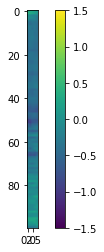

date:180324, rec:006, time:1560.0, label:1.0
date:180327, rec:001, time:6809.0, label:0.0


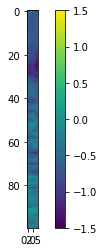

date:180329, rec:001, time:2734.0, label:0.0


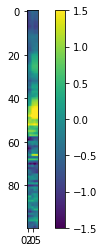

date:180330, rec:009, time:1996.0, label:0.0


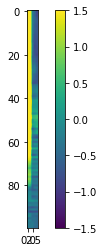

date:180711, rec:001, time:1569.0, label:0.0


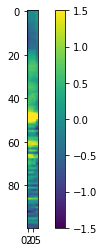

date:180410, rec:003, time:5772.0, label:1.0
date:180410, rec:002, time:6627.0, label:1.0
date:180711, rec:001, time:1664.0, label:0.0


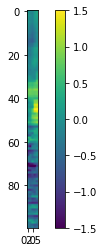

date:180714, rec:005, time:7041.0, label:1.0
date:180410, rec:002, time:347.0, label:1.0
date:180713, rec:001, time:5806.0, label:0.0


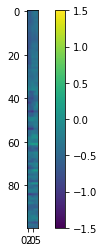

date:180714, rec:005, time:1137.0, label:1.0
date:180323, rec:006, time:1563.0, label:1.0
date:180711, rec:001, time:870.0, label:0.0


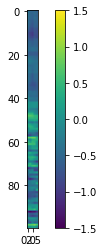

date:180330, rec:009, time:5818.0, label:0.0


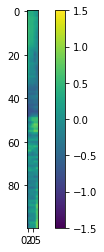

date:180329, rec:005, time:1997.0, label:1.0
date:180401, rec:002, time:3008.0, label:1.0
date:180713, rec:006, time:3371.0, label:1.0
date:180712, rec:002, time:292.0, label:0.0


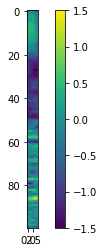

date:180323, rec:007, time:7178.0, label:0.0


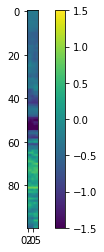

In [9]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [10]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 5

model = GLM(input_dim = 100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [11]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5452654957771301
Val loss for epoch 0: 0.5357824563980103
Train loss for epoch 1: 0.5365446209907532
Val loss for epoch 1: 0.5238537192344666
1
Train loss for epoch 2: 0.5356971025466919
Val loss for epoch 2: 0.5322714447975159
Train loss for epoch 3: 0.5353720188140869
Val loss for epoch 3: 0.5128781795501709
3
Train loss for epoch 4: 0.5350615382194519
Val loss for epoch 4: 0.5303235650062561
Train loss for epoch 5: 0.5347796082496643
Val loss for epoch 5: 0.4871229827404022
5
Train loss for epoch 6: 0.5346097350120544
Val loss for epoch 6: 0.4907064735889435
Train loss for epoch 7: 0.5345857739448547
Val loss for epoch 7: 0.5112355351448059
Train loss for epoch 8: 0.534044086933136
Val loss for epoch 8: 0.5171213746070862
Train loss for epoch 9: 0.5343431830406189
Val loss for epoch 9: 0.53076171875
Train loss for epoch 10: 0.5341957211494446
Val loss for epoch 10: 0.4895838797092438
Train loss for epoch 11: 0.5341629981994629
Val loss for epoch 11: 0.53513

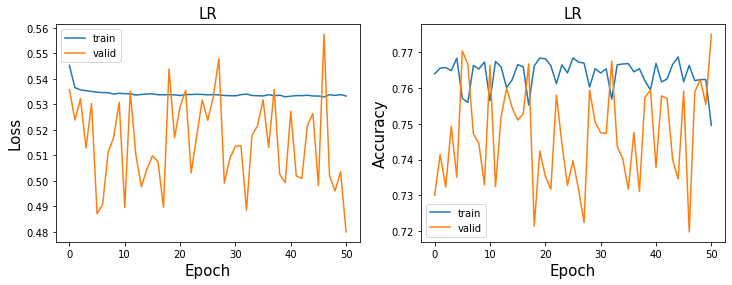

In [12]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [13]:
model = GLM(100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [14]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5666248798370361 accuracy:0.7152813439953049


In [15]:
np.mean(np.concatenate(test_labels))

0.74844104

In [16]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

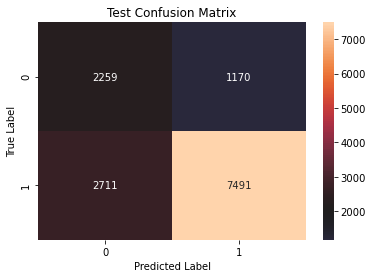

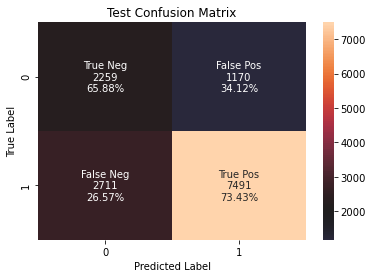

In [17]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [18]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180413, rec:005, time:410.0, label:1.0
Original data 62 CH


### Logistic regression with L2 regularization

In [19]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23
timewindow = 5

model = GLM(input_dim =1*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [20]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, timewindow = timewindow,  loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5463476777076721
Val loss for epoch 0: 0.5021154880523682
Train loss for epoch 1: 0.5376327633857727
Val loss for epoch 1: 0.5035768747329712
Train loss for epoch 2: 0.5363773703575134
Val loss for epoch 2: 0.5137940049171448
Train loss for epoch 3: 0.5360004901885986
Val loss for epoch 3: 0.5043445825576782
Train loss for epoch 4: 0.535606861114502
Val loss for epoch 4: 0.4914112091064453
4
Train loss for epoch 5: 0.5360153913497925
Val loss for epoch 5: 0.5098310112953186
Train loss for epoch 6: 0.535564124584198
Val loss for epoch 6: 0.5447524189949036
Train loss for epoch 7: 0.5356246829032898
Val loss for epoch 7: 0.5345727205276489
Train loss for epoch 8: 0.5351992249488831
Val loss for epoch 8: 0.48648127913475037
8
Train loss for epoch 9: 0.5353268384933472
Val loss for epoch 9: 0.5345031023025513
Train loss for epoch 10: 0.5351470708847046
Val loss for epoch 10: 0.5136582851409912
Train loss for epoch 11: 0.5355806350708008
Val loss for epoch 11: 0.54

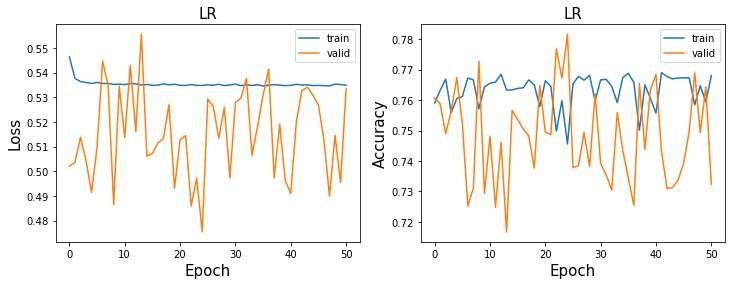

In [21]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

In [22]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [23]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5689521431922913 accuracy:0.7149878952387939


In [24]:
np.mean(np.concatenate(test_labels))

0.74844104

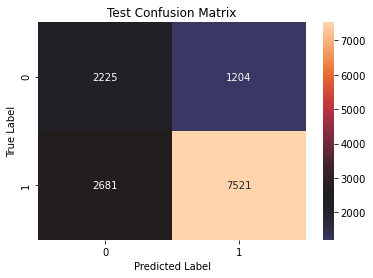

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2500)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180413, rec:005, time:410.0, label:1.0
Original data 62 CH


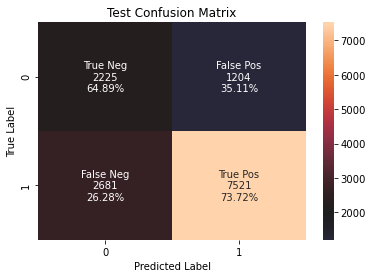

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(1):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

### Logistic Regression with finite difference regularization

In [27]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 25
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'


model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [28]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, timewindow = timewindow)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, timewindow = timewindow)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.582443356513977
Val loss for epoch 0: 0.5302881598472595
Train loss for epoch 1: 0.5701347589492798
Val loss for epoch 1: 0.5531189441680908
Train loss for epoch 2: 0.5702807903289795
Val loss for epoch 2: 0.5529196262359619
Train loss for epoch 3: 0.5706570744514465
Val loss for epoch 3: 0.5382220149040222
Train loss for epoch 4: 0.5698814392089844
Val loss for epoch 4: 0.5623469352722168
Train loss for epoch 5: 0.5703980922698975
Val loss for epoch 5: 0.53056401014328
Train loss for epoch 6: 0.570187509059906
Val loss for epoch 6: 0.5617783665657043
Train loss for epoch 7: 0.5703670382499695
Val loss for epoch 7: 0.5400990843772888
Train loss for epoch 8: 0.5707064867019653
Val loss for epoch 8: 0.5688896179199219
Train loss for epoch 9: 0.5702881217002869
Val loss for epoch 9: 0.5306667685508728
Train loss for epoch 10: 0.5701742768287659
Val loss for epoch 10: 0.5198835134506226
10
Train loss for epoch 11: 0.5701534748077393
Val loss for epoch 11: 0.529341

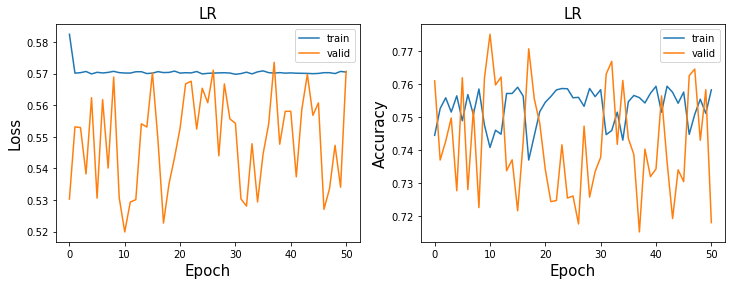

In [29]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [30]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [31]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.6008889675140381 accuracy:0.7025163230870809


In [32]:
np.mean(np.concatenate(test_labels))

0.74844104

In [33]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

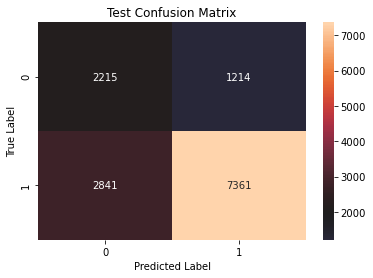

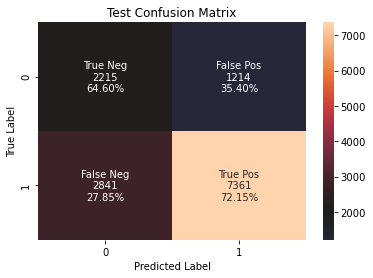

In [34]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [35]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

date:180413, rec:005, time:410.0, label:1.0
Original data 62 CH


### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

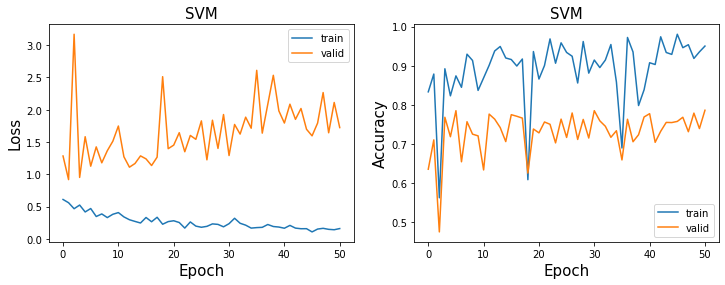

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

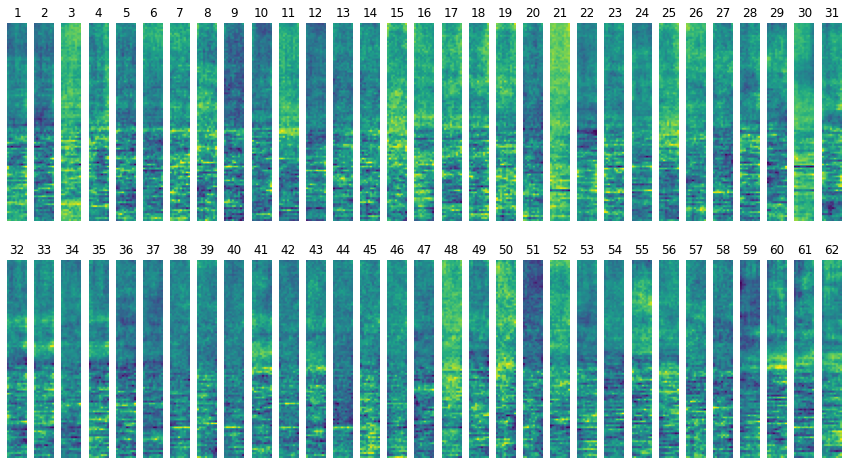

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


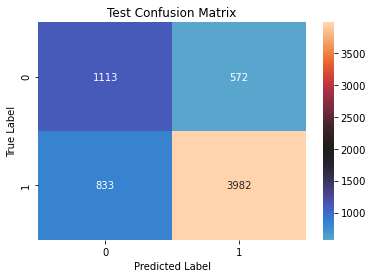

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


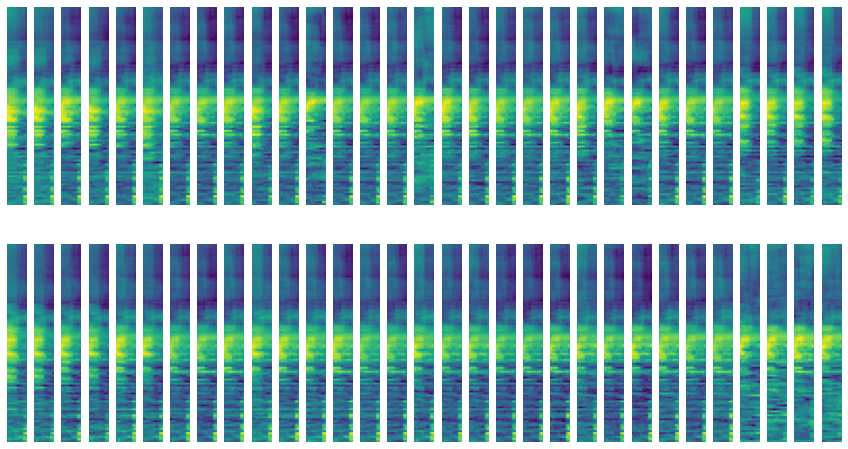

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

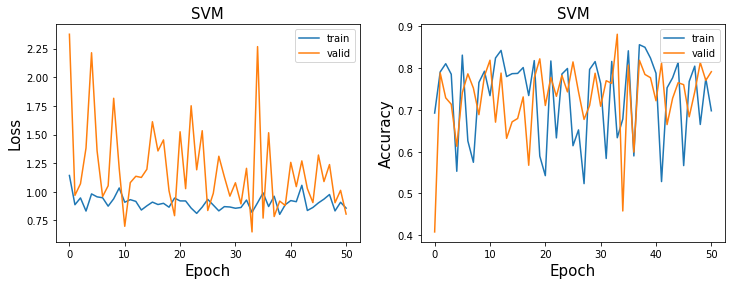

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

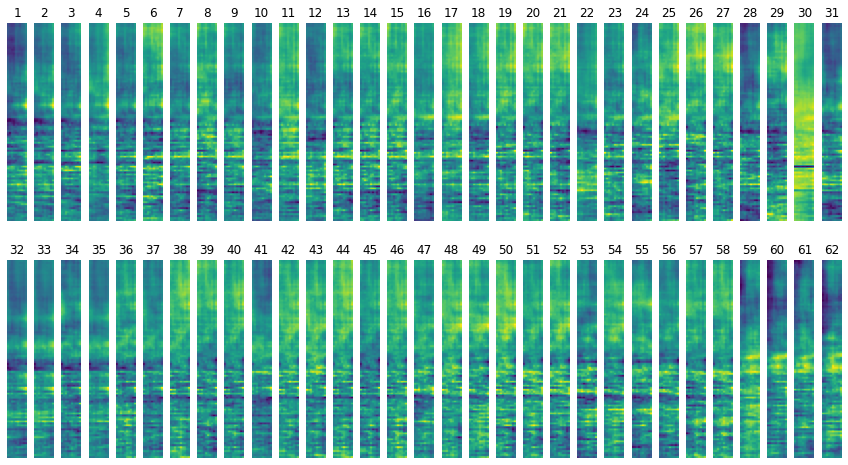

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


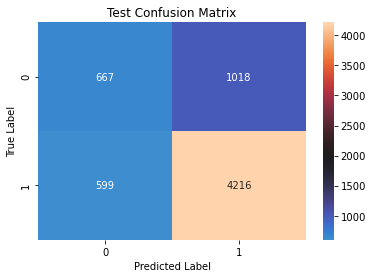

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


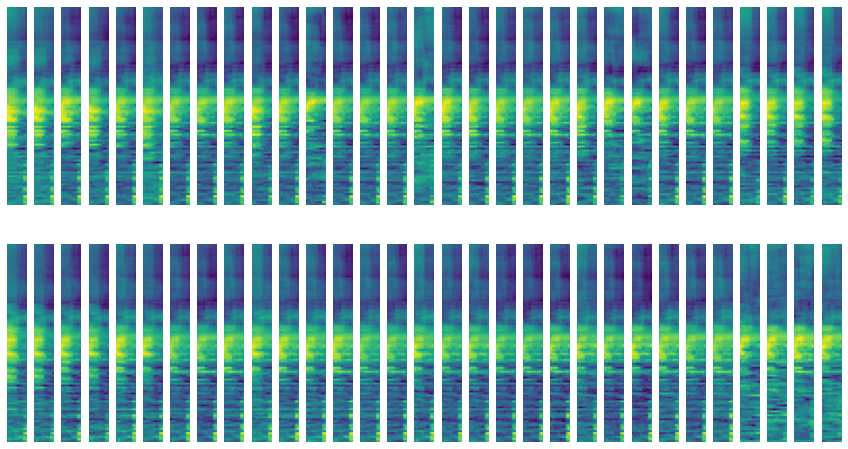

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

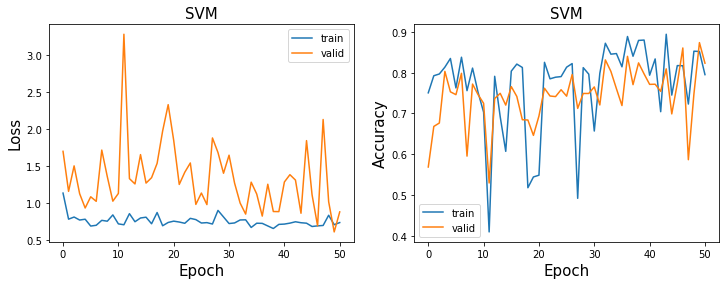

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

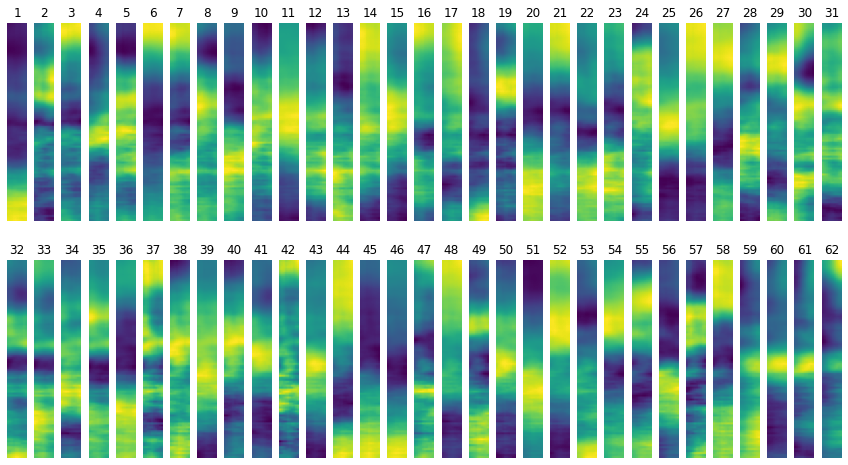

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


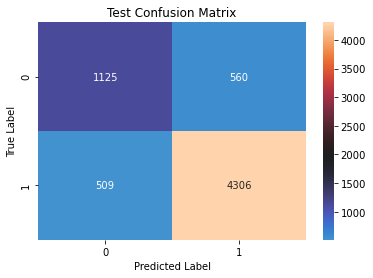

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


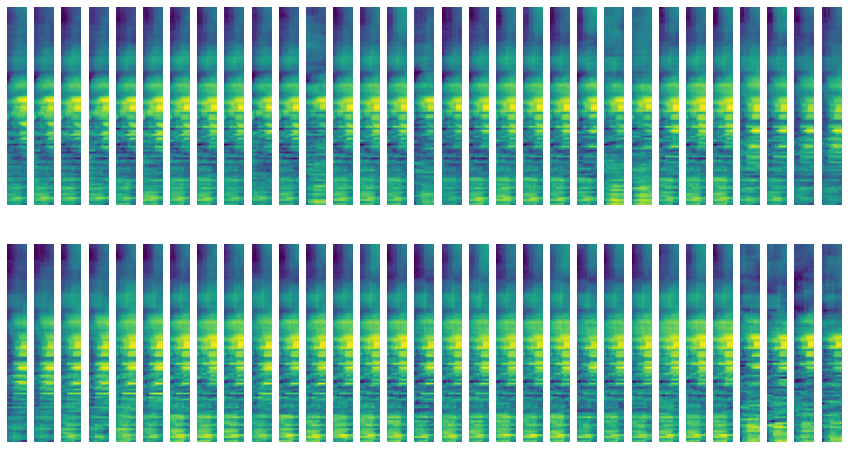

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()